<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.drop(columns=["Unnamed: 0"], inplace=True)
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## TASK: For the "Median value of owner-occupied homes" provide a boxplot:

<function matplotlib.pyplot.show(close=None, block=None)>

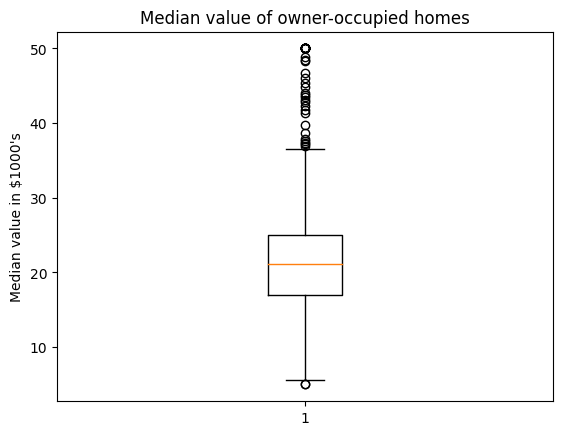

In [17]:
plt.boxplot(boston_df["MEDV"])
plt.title("Median value of owner-occupied homes")
plt.ylabel("Median value in $1000's")
plt.show

## TASK: Provide a  bar plot for the Charles river variable

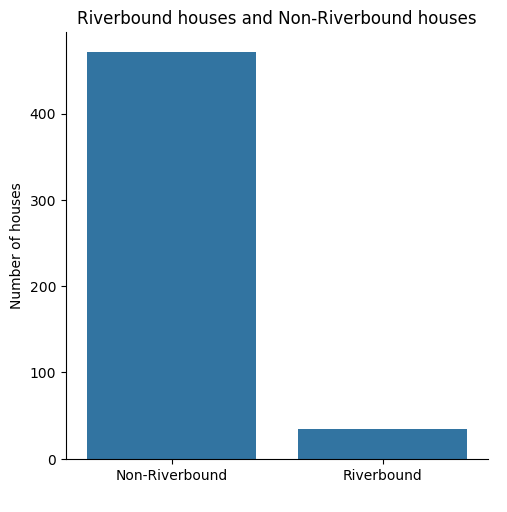

In [23]:
ax = sns.catplot(x="CHAS", kind="count", data=boston_df)
ax.set(title="Riverbound houses and Non-Riverbound houses")
ax.set_xticklabels(["Non-Riverbound", "Riverbound"])
ax.set_axis_labels(" ", "Number of houses")

## TASK: Provide a boxplot for the MEDV variable vs the AGE variable.
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

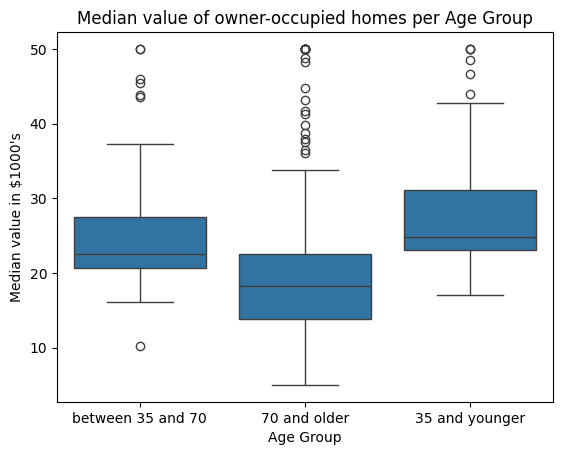

In [33]:
boston_df.loc[(boston_df["AGE"]<=35), "age_group"] = "35 and younger"
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70), "age_group"] = "between 35 and 70"
boston_df.loc[(boston_df["AGE"]>=70), "age_group"] = "70 and older"
ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
ax.set_xlabel("Age Group")
ax.set_ylabel("Median value in $1000's")
ax.set_title('Median value of owner-occupied homes per Age Group')
plt.show()

## TASK: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 0, 'Nitric oxides concentration (parts per 10 million)')

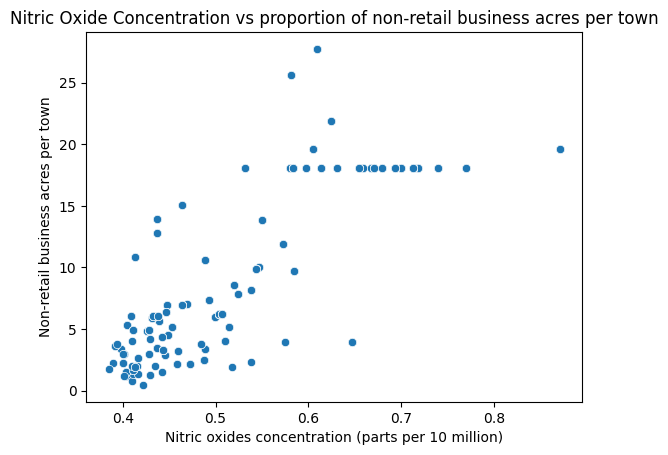

In [35]:
ax= sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Nitric Oxide Concentration vs proportion of non-retail business acres per town")
ax.set_ylabel("Non-retail business acres per town")
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")

**Conslusion** There is a linear correlation between nitric oxides consentration and the proportion of non-retail business acres per town. The higher the NOX concentration, the more non-retail business acres per town. (My guess would be that it benefits the agriculture)

## TASK: Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'Pupils per teacher')

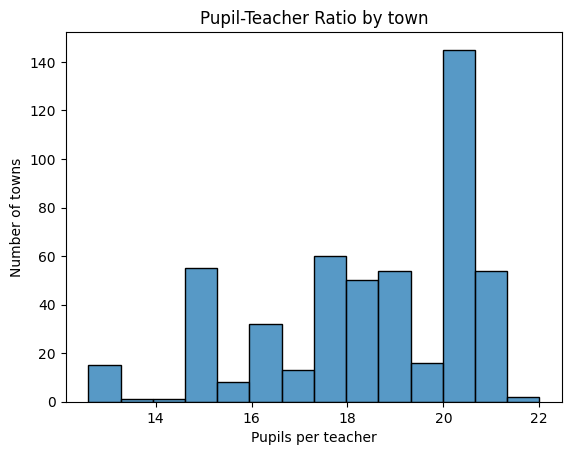

In [38]:
ax= sns.histplot(boston_df["PTRATIO"])
ax.set_title("Pupil-Teacher Ratio by town")
ax.set_ylabel("Number of towns")
ax.set_xlabel("Pupils per teacher")

## QUESTION: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: There is no significant difference in the median value of houses, whether they are river-bound or not.

Alternative hypothesis: There is a significant difference in the median value of houses, depending on whether they are river-bound or not.

α = 0.05

In [42]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** P-Value is lower than 0.05 so we reject the null hypothesis. This means, there is a significant difference in median house values depending on the location on the river or not.

## QUESTION: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null hypothesis: There is no significant difference in Median values of houses and the proportion of owner occupied units buikt prior to 1940.

Alternative hypothesis: At least one of the means differ.

α = 0.05

In [45]:
# Perform the test Statistics.
young = boston_df[boston_df[ "age_group"] == "35 and younger"]["MEDV"]
middle_aged = boston_df[boston_df["age_group"] == "between 35 and 70"]["MEDV"]
old = boston_df[boston_df["age_group"] == "70 and older"]["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(young, middle_aged, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** The p-value is lower than 0.05 so we will reject the null hypothesis. At least one of the means differ.

## QUESTION: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis: There is no correlation between Nitric oxide consentrations and the proportion of non-retail business acres per town.

Alternative hypothesis: Nitric oxide consentrations and the proportion of non-retail business acres per town have a correlation.

α = 0.05

In [47]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** As we already saw in the scatterplot, there is a rather strong positive correlation between the two variables. The p-value is lower than 0.05, so again, the result is statistically significant and we reject the null hypothesis.

## QUESTION: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Alternative hypothesis: The additional weighted distance to the five Boston employment centres does have an impact on the median value of owner occupied homes.

α = 0.05

In [48]:
X = boston_df["DIS"]
y= boston_df["MEDV"]

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        14:02:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** There is a positive correlation between the distance to the five Boston employment centres and the median value of owner occupied homes. P-Value is less than 0.05 so we reject the null hypothesis - there is an impact.